# 5.0 - Classificação

Antes de definir os principais conceitos e tópicos da classificação, precisamos entender o que é uma classificação e como ela é definida:

* **Classificação:** é usada para identificar as categorias de um conjunto de dados, ou seja, a classificação é o ato de classificar itens com características semelhantes. Um exemplo é classificar os emails como spam ou não spam.

* **Modelos de Classificação:** tanto os modelos de regressão quanto os modelos de classificação, são categorizados como aprendizado de máquina supervisionado, pois ambos possuem uma coluna 'target' que é passada para o treino e teste dos modelos.

* **Diferença entre modelos de Regressão e Classificação:** A principal diferença entre os dois modelos é que nos modelos de regressão, a variável de saída é numérica, enquanto a variável de saída nos modelos de classificação é categórica.

## 5.1 - Árvore de classificação (decisão):

Uma árvore de classificação/decisão, é um algoritmo que se baseia na idéia de 'dividir para conquistar', ou seja, faz a divisão dos dados em grupos homogêneos. Como estamos tratando de uma classificação, a árvore de decisão utiliza um conjunto de regras binárias (0/1 ou Verdadeiro/Falso) para calcular um target no conjunto de dados. A imagem abaixo ilustra uma árvore de decisão:

<img src="https://i.ibb.co/9VfZk71/tree.png"></img>

* **Nó Raiz:** o primeiro nó da árvore, executa a primeira divisão.
* **Sub-Nó:** é o nó intermediário, quando se divide em mais sub-nós, é chamado de nó de decisão.
* **Nó Folha/Terminal:** é o nó que está na última camada e não possui nós 'filhos', é o nó que prevê os resultados

### Vantagens:
* Tem fácil interpretação; 
* Escolhe os atributos mais relevantes em cada caso;
* Pode ser usado tanto na regressão, quanto na classificação.

### Desvantagens:
* Pode se tornar um modelo complexo;
* Sensibilidade a pequenas alterações no conjunto de treino.

O exemplo abaixo usa o conjunto de dados Iris, e a árvore de decisão sendo aplicada para classificar os três tipos de flor:

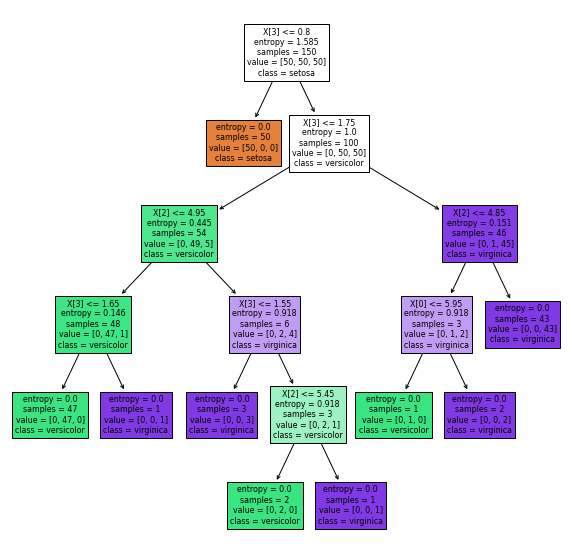

In [27]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

iris = load_iris()

X = iris.data
y = iris.target

clf = tree.DecisionTreeClassifier(criterion="entropy")
irisTree = clf.fit(X, y)

allScores = cross_val_score(clf, X, y , cv=10)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(irisTree, class_names=['setosa', 'versicolor', 'virginica'], filled=True);

## 5.2 - Random Forest:

O Random Forest é um dos algoritmos de machine learning supervisionado usado na classificação e na regressão. Foi criado visando acabar com o problema de overfitting das árvores de decisão, pois ele adiciona aleatoriedade nas escolhas dentro da árvore. Esse método consiste na criação de várias árvores aleatórias combinadas para predizer o melhor resultado.
Essa aleatoriedade se deve a dois conceitos importantes em ML, o bootstrap e o bagging:
* **Bootstrap:** é o processo que é muito usado na estatística, pois ele é definido da seguinte maneira: é feita a escolha de uma amostra da população, após isso, tentamos reconstruir a população fazendo infinitas cópias da amostra. Com a população reconstruída, escolhemos outras amostras em cima desta nova população. E ao criar as novas amostras, estamos escolhendo aleatoriamente os dados da população.

* **Bagging:** consiste em criar algumas amostras em cima da população reconstruída, e definir cada amostra para um modelo diferente. Após esta definição, combinamos os modelos e treinamos as árvores. Ao final, é feito uma média dos resultados obtidos e no caso da classificação, escolhemos o valor que mais aparece. 

A imagem abaixo ilustra o funcionamento do algoritmo Random Forest:

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png" width="500px"></img>

### Vantagens:
* Pode ser usado tanto na regressão, quanto na classificação; 
* Suporta conjuntos de dados extensos;
* Possui melhores resultados, pois tem viés e variância baixa.

### Desvantagens:
* São necessários mais recursos para a computação, ou seja, é um método custoso;
* Consome mais tempo comparado a árvore de decisão.

## 5.3 - Estratégias de Boosting: Gradient Boosting, ADA Boosting, etc. :

Assim como o Bagging que já foi explicado anteriormente, o Boosting é uma outra técnica de Ensemble Learning (aprendizado por agrupamento), ou seja, é um método que usa vários algoritmos de aprendizado para obter uma melhor predição. 

   O Boosting se difere do Bagging, pois ele ao invés de treinar o modelo de forma independente, ou seja, de maneira paralela, ele faz esse processo de forma sequencial, ou seja, faz a análise dos modelos que foram previamente treinados. 
    
   A função do Boosting é reduzir o viés dos preditores simples, com base nisso, é bom escolher modelos simples com alto viés e baixa variância. A imagem abaixo ilustra a comparação entre Bagging e o Boosting:

<img src="https://www.datascienceland.com/media/uploads/2020/11/29/difference.png" width="700 px"></img>

Agora vamos definir algumas das principais estrátegias de Boosting:

### AdaBoost (Adaptive Boosting):
O objetivo do AdaBoost é combinar os modelos mais fracos de uma forma sequencial, assim os modelos simples (weak learners), levam em consideração as predições resultantes do modelo anterior, desta forma é gerado um preditor mais resumido. Este método leva em considerações alguns pesos sobre os modelos, assim cada modelo possui um peso padrão e no decorrer do treinamento, as observações corretas recebem um peso maior do que as observações que possuem maior chance de erro.

### Gradient Boosting:
A grande diferença entre o Gradient Boosting e o Adaboost, é que o Gradient ao invés de estabelecer pesos aos weak learners, faz novos treinamentos com base nos erros residuais dos modelos passados. Ou seja, ele tenta prever os erros e não o target, assim a predição final consiste na soma de todos os weak learners. É feito várias iterações, e cada vez é gerado erros residuais menores, assim no final obtemos uma versão mais corrigida da primeira predição.

### XGBoost (Extreme Gradient Boosting):
O XGBoost é uma otimização do Gradient Boosting, pois ele é uma biblioteca do Gradient que tem o objetivo de ser mais eficiente, flexível e portável. Assim como o Gradient, ele usa o conceito de boosting paralelo para treinar os modelos, porém possui uma otimização de software e de hardware para usar menos recursos da computação e no menor tempo possível.

O exemplo abaixo mostra o AdaBoost sendo aplicado sobre o conjunto de dados Iris: 

Accuracy:  0.9666666666666667
F1 Score:  0.9665634674922601


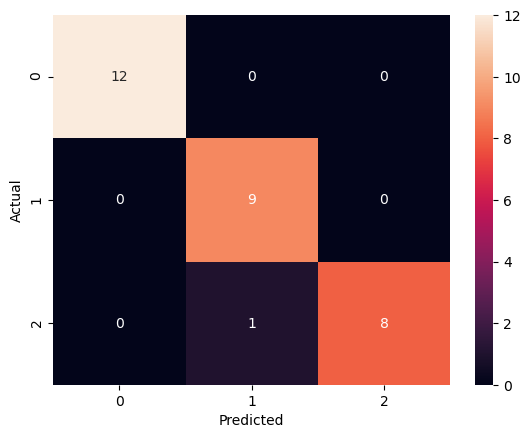

In [14]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=32)

classifier2 = AdaBoostClassifier(random_state=0)
classifier2.fit(X_train, y_train)

y_pred2 = classifier2.predict(X_test)

acc_test2 = accuracy_score(y_test, y_pred2)
f1_test2 = f1_score(y_test, y_pred2, average= 'weighted')

print("Accuracy: ", acc_test2)
print("F1 Score: ", f1_test2)

confusion_matrix = pd.crosstab(y_test, y_pred2, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

## 5.4 - Regressão logística:

Apesar de ter a palavra regressão no nome, a Regressão Logística é um algoritmo usado na classificação. É semelhante a regressão linear, porém recebe valores reais como entrada e retorna valores binários entre 0 e 1 para as suas predições. A regressão logística consegue predizer tanto a classe de observação, quanto a probabilidade de cada classe. É um método que pode ser usado na categorização de imagens, em diagnósticos médicos, em previsões climáticas e em muitos outros casos.
Abaixo temos a comparação entre as curvas da Regressão Linear e Logística:

<img src="https://estatsite.com.br/wp-content/uploads/2018/08/1-3.jpg" width="700px"></img>

### Vantagens:
* É um modelo fácil de implementar, rápido e possui um bom desempenho;
* É o algoritmo menos suscetível a overfitting;
* Os seus coeficientes estabelecem pesos aos atributos, assim mostrando o quão relevante é um atributo.

### Desvantagens:
* Possui problemas com conjunto de dados de alta dimensionalidade;
* Precisa de uma atenção maior na parte de pré-processamento dos dados.

O exemplo abaixo usa a Regressão Logística para predizer se um aluno vai ser arovado na pós-graduação, com base em alguns parâmetros númericos:

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

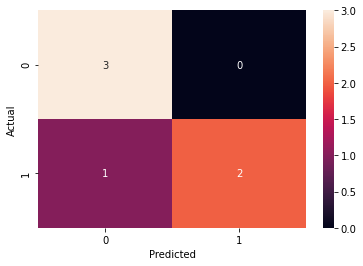

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.read_excel('dados.xlsx')

X = df[['POSCOMP', 'Inglês','Artigos publicados']]
y = df['Admitido']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

## 5.5 - KNN (K-Nearest Neighbors):

É um algoritmo que acredita que as coisas similares estão perto uma das outras, ou seja, o KNN utiliza a similaridade calculando a distância entre os dados, e assumindo que os seus 'vizinhos' são valores de mesma classificação. Para calcular essa distância, é usado algumas métricas como: Distância Euclidiana, Cosine Similarity, Minkowski, etc. A seguir, está definida as duas métricas mais usadas:
* **Distância Euclidiana:** é formada pela raiz quadrada da soma das diferenças de cada característica ao quadrado. É dada pela seguinte fórmula:
$$d_{AB} = \sqrt{(x_{2} - x_{1})^2 + (y_{2} - y_{1})^2}$$

* **Cosine Similarity:** é uma métrica usada em casos onde a direção dos vetores é mais importante que a magnitude. É dada pela seguinte fórmula:
$$similaridade = cos(\theta) = \frac{A \cdot B}{\left \| A \right \| \left \| B \right \|}$$

O K significa o número de vizinhos escolhidos para a classificação. A imagem abaixo, mostra o funcionamento do KNN considerando K = 1:

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png"></img>

Agora precisamos saber como escolher o número K de vizinhos necessários para uma boa predição. Para isso pode ser usada a validação cruzada, ou até mesmo fazer a raiz quadrada aproximada do número total de dados da base de teste. Porém temos que tomar cuidado, pois um número K muito pequeno pode causar overfitting, e em contrapartida um número K muito grande pode causar underfitting.

### Vantagens:
* É bom quando não conhecemos muito bem o nosso conjunto de dados;
* É bem versátil para dados não lineares;
* Possui um bom desempenho para a separação em conjuntos de dados pequenos.

### Desvantagens:
* Desempenho não tão bom em datasets grandes, pois precisa memorizar todos os dados de treino e calcular todas as distâncias entre os dados;
* Por conta do alto custo de computação em datasets grandes, são utilizados algoritmos que possuem discriminação, ou seja, são trocados por algoritmos que possuem dados de treino e de teste (eager algorithms), ao invés de métodos que não utilizam a base de treino (lazy algorithms).

O exemplo abaixo ilustra os valores preditos usando KNN, do conjunto de dados de pessoas que tem, ou que futuramente irão desenvolver diabetes:

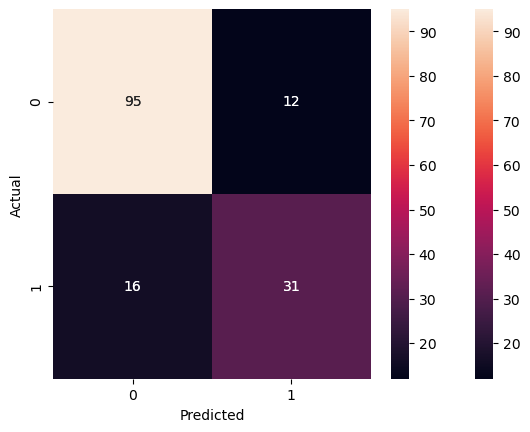

In [9]:
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

df = pd.read_csv('diabetes.csv')

nao_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for A in nao_zero:
    df[A] = df[A].replace(0,np.NaN)
    média = int(df[A].mean(skipna=True)) 
    df[A] = df[A].replace(np.NaN,média)

X = df.iloc[:,0:8]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

np.sqrt(768*0.2)

classifier = KNeighborsClassifier(n_neighbors=13, metric='euclidean')
classifier.fit(X_train, y_train)

y_previsao = classifier.predict(X_test)
matriz_de_confusao = confusion_matrix(y_test,y_previsao)

matriz_de_confusao = pd.crosstab(y_test, y_previsao, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(matriz_de_confusao, annot=True)
plt.show()

## 5.6 - Naive Bayes (Gaussiano x Bernoulli):

O Naive Bayes se baseia na probabilidade de eventos e não na correlação entre as features. Ou seja,
ele se baseia no Teorema de Bayes, que descreve a probabilidade de um evento com base no 
conhecimento prévio das condições que podem estar relacionadas ao evento. É muito usado na 
categorização de textos, por exemplo na categorização de emails, definindo se um email é spam ou 
não. A fórmula é dada da seguinte maneira:

<img src="https://miro.medium.com/max/468/1*IGwM9cb8W-gyJW5rkiVQPw.jpeg"></img>

Temos alguns algoritmos para a implementação do Naive Bayes, abaixo definimos o método Gaussiano e o Bernoulli:

### Gaussian Naive Bayes:
É definido pelo uso de uma distribuição de probabilidade Gaussiana. O algoritmo é simbolizado pela seguinte equação:

$$P(x_{i}|y) = \frac{1}{\sqrt{2\pi \sigma^2_{y}}}exp(-\frac{(x_{i} - \mu_{y})^2}{2\sigma^2_{y}})$$

Onde a média (μy) é o valor médio de $x_{i}$, considerando as observações de classe y. E o desvio 
padrão (σy) é o desvio padrão da feature $x_{i}$, considerando as observações da classe y.

### Bernoulli Naive Bayes:
Já nesse algoritmo, é usado a distribuição de Bernoulli, que é composta por diversas features que são valores binários. É simbolizado pela seguinte equação:

$$P(x_{i}|y) = P(i|y)x_{i} + (1 - P(i|y))(1 - x_{i}) $$

Onde P(i | y) é o parâmetro p da distribuição de Bernoulli. E P(i | y) = p se y = true, e P(i | y) = 1-p se y = False.

### Vantagens:
* É um algoritmo de fácil entendimento;
* Possui um melhor desempenho com a entrada de dados categórica do que a númerica;
* Também pode ser treinado com conjuntos de dados pequenos.

### Desvantagens:
* O algoritmo tem um problema com features que possuem zero de frequência, pois desta forma a probabilidade total também se torna zero;
* É conhecido por ser um mal estimador, por causa disso as saídas probabilísticas não são tão eficazes;
* As features independentes possuem um peso muito grande sobre o algoritmo, porém esses problemas não acontecem na vida real, pois é quase impossível de termos as features completamente independetes.

O exemplo abaixo usa o conjunto de dados Iris, com o método Gaussian Naive Bayes: 

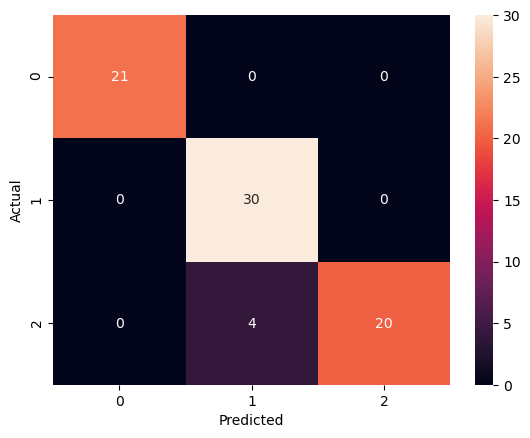

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

model = GaussianNB()
y_pred = model.fit(X_train, y_train).predict(X_test)

matriz_de_confusao = confusion_matrix(y_test, y_pred)

matriz_de_confusao = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(matriz_de_confusao, annot=True)
plt.show()

## 5.7 - Redes Neurais:

As Redes Neurais são um tipo de algoritmo capaz de reconhecer padrões, e ele consegue adquirir esse 
conhecimento através da experiência. O funcionamento das redes neurais se assemelha com os neurônios 
do nosso cérebro, pois elas possuem os receptores de entrada que percebem as informações (ou sinais), possuem um processamento que é capaz de modificar a sua programação dependendo do tipo de sinal, e também possui uma saída binária que pode apresentar 0 ou 1 de acordo com o seu processamento.
    
   Analisando o modelo completo, temos um conjunto de neurônios que estão divididos em diferentes camadas do modelo. E a cada informação que é processada por um dos neurônios, gera um peso, onde se ocorrer um acerto, é somado um ponto, e se for um erro, perde-se um ponto. Desta forma, a cada iteração, o sistema segue o caminho com mais pontos, e no final do processo de aprendizado, o modelo é capaz de executar as tarefas quase sem nenhum erro. A imagem abaixo, ilustra a estrutura de uma rede neural:

<img src="https://www.cin.ufpe.br/~if114/Monografias/Redes%20Neurais/Com%20Pesos/mlp2.gif"></img>

### Vantagens:
* O algoritmo é capaz de ter um aprendizado por meio da experiência sobre os exemplos de um problema;
* É capaz de manipular dados númericos, aproximados e até mesmo incorretos, pois esses dados são descartados após cada iteração;
* Grande poder de representação dos conhecimentos através dos pesos exercidos sobre cada informação;

### Desvantagens:
* Por ser um algoritmo que faz várias repetições, o processo de aprendizado se torna lento;
* É difícil configurar as suas redes em relação a estrutura inicial;
* Possui uma dificuldade em expressar o conhecimento adquirido para uma linguagem compreensível ao ser humano.

## 5.8 - SVM (Support Vector Machine):

O SVM é um algoritmo que define uma reta que divide duas classes diferentes, ou seja, ele faz a classificação dos dados através da separação entre as classes que se diferem. Essa separação é feita por uma reta (ou hiperplano quando estamos tratando de maiores dimensões), que é tracejada calculando a menor distância entre as classes através de um ponto em cada classe, que mais se aproxima da outra classe. A imagem a seguir exemplifica o funcionamento do SVM:

<img src="https://miro.medium.com/max/724/1*Rpw8EXp3kI_dObeSlZ4RWw.png" width="500px"></img>

O SVM também é capaz de fazer as classificações com dados não lineares, ou seja, os dados em que somente uma reta não é capaz de dividir as classes. Isso acontece primeiro com a transformação do espaço não linear do espaço, e depois os grupos são separados com um SVM linear.

### Vantagens:
* É capaz de fazer a classificação tanto de dados lineares, quanto de dados não lineares;
* Permite uma boa predição usando a acurácia, mesmo não tendo tanto conhecimento sobre os dados;
* Funciona bem em espaços com muitas dimensões (ou features). 

### Desvantagens:
* É difícil interpretar o seu resultado, mas não impossível;
* Tem um desempenho reduzido quando o conjunto de dados aumenta, pois os cálculos necessários também aumentam.

A prática abaixo ilustra a classificação do conjunto de dados Iris, usando o SVM como método de separação das flores:

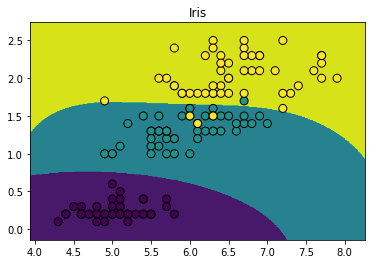

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

data = load_iris()
iris = pd.DataFrame(data['data'], columns=data.feature_names)
iris['target'] = data.target
target = iris.pop('target')

svc = SVC(gamma="auto")
svc.fit(iris, target)

x0_min, x0_max = iris['sepal length (cm)'].min(), iris['sepal length (cm)'].max()
x1_min, x1_max = iris['petal width (cm)'].min(), iris['petal width (cm)'].max()
w = x0_max - x0_min
h = x1_max - x1_min
x0, x1 = np.meshgrid(np.linspace(x0_min-.1*w, x0_max+.1*w, 300),
                         np.linspace(x1_min-.1*h, x1_max+.1*h, 300))

svc.fit(iris[['sepal length (cm)', 'petal width (cm)']], target)
ypred = svc.predict(np.c_[x0.reshape(-1, 1), x1.reshape(-1, 1)])
ypred = ypred.reshape(x0.shape)
        
plt.contourf(x0, x1, ypred)
plt.scatter(iris['sepal length (cm)'], iris['petal width (cm)'], c=target, s=64, edgecolors='k')
plt.title('Iris')
plt.show()